In [ ]:
import numpy as np
import cv2

In [ ]:
in_lbs_per_second_2_watts = 0.11298
in_lbs_2_newton_meter = 0.11298


# define pedal class
class Pedal:
    throw_distance = -1.0 # in
    length = -1.0 # in 
    force = -1.0 # lbs
    torque = -1.0 # in*lbs
    throw_time = -1.0 # seconds
    lin_speed = -1.0
    ang_speed = -1.0
    power = -1.0 # in * lbs / sec
    power_watts = -1.0
    name = ""
    
    def __init__(self, n):
        self.name = n
    
    def set_throw_distance(self, td):
        self.throw_distance = td
        
    def set_throw_time(self, tt):
        self.throw_time = tt
        
    def set_length(self, l):
        self.length = l
        
    def set_force(self, f):
        self.force = f
        
    def print_params(self):
        print(self.name + ": throw distance: ", self.throw_distance, " inches")
        print(self.name + ": length: ", self.length, " inches")
        print(self.name + ": force: ", self.force, " lbs")
        print(self.name + ": torque: ", self.torque, "in*lbs")
        print(self.name + ": torque: ", self.torque_nm, "Newton meters")
        print(self.name + ": throw time: ", self.throw_time, "s")
        print(self.name + ": linear speed: ", self.lin_speed, "in/s")
        print(self.name + ": angular speed: ", self.ang_speed, "rad/s")
        print(self.name + ": power: ", self.power, "lbs * in/s")
        print(self.name + ": power: ", self.power_watts, "watts")
        
        print("\n")
        
    def calc_torque(self):
        self.torque = self.force * self.length
        self.torque_nm = self.torque * in_lbs_2_newton_meter
        
    def calc_speed(self):
        self.lin_speed = self.throw_distance / self.throw_time
        self.ang_speed = self.lin_speed / self.length
        
    def calc_power(self):
        self.power = self.lin_speed * self.force
        self.power_watts = self.power * in_lbs_per_second_2_watts
        
    def test_linear_actuator(self, la):
        if la.power >= self.power:
            r = la.speed /  self.ang_speed
            print(self.name + ": Linear Actuator: " + la.name + " will work with arm length: ", r, " in")
            
        else:
            print(self.name + ": Linear Actuator: " + la.name + " will NOT work")

In [196]:
# brake pedal params
brake = Pedal("Brake")
brake.set_force(75.0) # lbs
brake.set_length(7.0) # inches
brake.set_throw_distance(2.5) # inches
brake.set_throw_time(0.1) # seconds
brake.calc_torque()
brake.calc_speed()
brake.calc_power()
brake.print_params()

# gas pedal params
gas = Pedal("Gas")
gas.set_force(10.0) # lbs - this is a guess
gas.set_length(6.0) # inches
gas.set_throw_distance(7.0) # inches
gas.set_throw_time(0.2) # seconds
gas.calc_torque()
gas.calc_speed()
gas.calc_power()
gas.print_params()

Brake: throw distance:  2.5  inches
Brake: length:  7.0  inches
Brake: force:  75.0  lbs
Brake: torque:  525.0 in*lbs
Brake: torque:  59.314499999999995 Newton meters
Brake: throw time:  0.1 s
Brake: linear speed:  25.0 in/s
Brake: angular speed:  3.5714285714285716 rad/s
Brake: power:  1875.0 lbs * in/s
Brake: power:  211.8375 watts


Gas: throw distance:  7.0  inches
Gas: length:  6.0  inches
Gas: force:  10.0  lbs
Gas: torque:  60.0 in*lbs
Gas: torque:  6.7787999999999995 Newton meters
Gas: throw time:  0.2 s
Gas: linear speed:  35.0 in/s
Gas: angular speed:  5.833333333333333 rad/s
Gas: power:  350.0 lbs * in/s
Gas: power:  39.543 watts




In [197]:
# define an actuator
class Actuator:
    force = -1
    speed = -1
    
    def __init__(self, n, f, s, c, l):
        self.name = n
        self.force = f
        self.speed = s
        self.power = f * s
        self.cost = c
        self.link = l

    def print_params(self):    
        print(self.name + ": force: ", self.force, " lbs")
        print(self.name + ": speed: ", self.speed, " in/s")
        print(self.name + ": power: ", self.power, " in*lbs*s")
        print(self.name + ": cost: $", self.cost)
        print(self.name + ": link: ", self.link)

In [198]:
# add in linear actuators
lin0 = Actuator('Progressive Automation 850', 850, 0.605, 317.00, "https://www.progressiveautomations.com/products/heavy-duty-linear-actuator?variant=30315111448643")
lin0.print_params()
lin1 = Actuator('Progressive Automation 2000', 2000, 0.3, 317.00, "https://www.progressiveautomations.com/products/heavy-duty-linear-actuator?variant=30315111448643")
lin1.print_params()
lin2 = Actuator("Amazon", 330, 0.39, 41.99, "https://www.amazon.com/ECO-WORTHY-330lbs-Tracker-Actuator-Multi-function/dp/B00NM8H5VO/ref=sr_1_1_sspa?crid=23MSITVAZC7CY&keywords=linear%2Bactuator&qid=1673836220&sprefix=linear%2Bactuat%2Caps%2C500&sr=8-1-spons&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUExUko2VjlKMkk4NEc1JmVuY3J5cHRlZElkPUEwMjMyNTQ3MldERjhDWldSTFNFQyZlbmNyeXB0ZWRBZElkPUEwMTQzOTAwMjBWTkpKSkZJTTVSNiZ3aWRnZXROYW1lPXNwX2F0ZiZhY3Rpb249Y2xpY2tSZWRpcmVjdCZkb05vdExvZ0NsaWNrPXRydWU&th=1")
lin2.print_params()

Progressive Automation 850: force:  850  lbs
Progressive Automation 850: speed:  0.605  in/s
Progressive Automation 850: power:  514.25  in*lbs*s
Progressive Automation 850: cost: $ 317.0
Progressive Automation 850: link:  https://www.progressiveautomations.com/products/heavy-duty-linear-actuator?variant=30315111448643
Progressive Automation 2000: force:  2000  lbs
Progressive Automation 2000: speed:  0.3  in/s
Progressive Automation 2000: power:  600.0  in*lbs*s
Progressive Automation 2000: cost: $ 317.0
Progressive Automation 2000: link:  https://www.progressiveautomations.com/products/heavy-duty-linear-actuator?variant=30315111448643
Amazon: force:  330  lbs
Amazon: speed:  0.39  in/s
Amazon: power:  128.70000000000002  in*lbs*s
Amazon: cost: $ 41.99
Amazon: link:  https://www.amazon.com/ECO-WORTHY-330lbs-Tracker-Actuator-Multi-function/dp/B00NM8H5VO/ref=sr_1_1_sspa?crid=23MSITVAZC7CY&keywords=linear%2Bactuator&qid=1673836220&sprefix=linear%2Bactuat%2Caps%2C500&sr=8-1-spons&spLa=ZW5

In [199]:
gas.test_linear_actuator(lin0)
brake.test_linear_actuator(lin0)

Gas: Linear Actuator: Progressive Automation 850 will work with arm length:  0.10371428571428572  in
Brake: Linear Actuator: Progressive Automation 850 will NOT work


In [200]:
# set up a motor class
class Motor:
    max_torque = -1.0
    max_speed_rpm = -1.0
    max_speed_radians_per_second = -1.0
    name = ""
    link = ""
    def __init__(self, n, l, t, s, c):
        self.max_torque = t
        self.max_speed_rpm = s
        self.max_speed_radians_per_second = t * s * np.pi * 2.0 / 30.0
        self.name = n
        self.link = l
        self.cost = c
        self.power = t * self.max_speed_radians_per_second
        
    def print_params(self):    
        print(self.name + ": torque: ", self.max_torque, " in-lbs")
        print(self.name + ": speed: ", self.max_speed_rpm, " rpm")
        print(self.name + ": speed: ", self.max_speed_radians_per_second, " rads/s")
        print(self.name + ": power: ", self.power, " in*lbs*s")
        print(self.name + ": cost: $", self.cost)
        print(self.name + ": link: ", self.link)

In [201]:
mot0 = Motor("Bison DC Gear Motor", "https://www.grainger.com/product/BISON-DC-Gearmotor-12V-DC-35TV53", 443.0, 23.0, 1062.42)
mot0.print_params()

Bison DC Gear Motor: torque:  443.0  in-lbs
Bison DC Gear Motor: speed:  23.0  rpm
Bison DC Gear Motor: speed:  2133.9791698284266  rads/s
Bison DC Gear Motor: power:  945352.772233993  in*lbs*s
Bison DC Gear Motor: cost: $ 1062.42
Bison DC Gear Motor: link:  https://www.grainger.com/product/BISON-DC-Gearmotor-12V-DC-35TV53


In [202]:
import math

def circle_intersection(circle1, circle2):
    '''
    @summary: calculates intersection points of two circles
    @param circle1: tuple(x,y,radius)
    @param circle2: tuple(x,y,radius)
    @result: tuple of intersection points (which are (x,y) tuple)
    '''
    # return self.circle_intersection_sympy(circle1,circle2)
    x1,y1,r1 = circle1
    x2,y2,r2 = circle2
    # http://stackoverflow.com/a/3349134/798588
    dx,dy = x2-x1,y2-y1
    d = math.sqrt(dx*dx+dy*dy)
    if d > r1+r2:
        print('no solutions, the circles are separate')
        return None
    if d < abs(r1-r2):
        print('no solutions because one circle is contained within the other')
        return None
    if d == 0 and r1 == r2:
        print('circles are coincident and there are an infinite number of solutions')
        return None

    a = (r1*r1-r2*r2+d*d)/(2*d)
    h = math.sqrt(r1*r1-a*a)
    xm = x1 + a*dx/d
    ym = y1 + a*dy/d
    xs1 = xm + h*dy/d
    xs2 = xm - h*dy/d
    ys1 = ym - h*dx/d
    ys2 = ym + h*dx/d

    return (xs1,ys1),(xs2,ys2)

circle_intersection((0,0,1), (0.5,0,1))

((0.25, -0.9682458365518543), (0.25, 0.9682458365518543))

In [203]:
import sympy

def circle_circle_intersection(circle1, circle2):
    #https://gist.github.com/xaedes/974535e71009fa8f090e
    x1,y1,r1 = circle1
    x2,y2,r2 = circle2
    c1=sympy.Circle(sympy.Point(x1,y1),r1)
    c2=sympy.Circle(sympy.Point(x2,y2),r2)
    intersection = c1.intersection(c2)
    if len(intersection) == 0:
        print("No intersection between circles")
        return
    if len(intersection) == 1:
        intersection.append(intersection[0])
    p1 = intersection[0]
    p2 = intersection[1]
    xs1,ys1 = float(p1.x), float(p1.y)
    xs2,ys2 = float(p2.x), float(p2.y)
    return (xs1,ys1),(xs2,ys2)

def circle_line_intersection(circle1, line1):
    x1,y1,r1 = circle1
    x2,y2,x3,y3 = line1
    c1=sympy.Circle(sympy.Point(x1,y1),r1)
    l1=sympy.Segment(sympy.Point(x2,y2), sympy.Point(x3,y3))
    intersection = c1.intersection(l1)
    if len(intersection) == 0:
        print("No line segment intersection")
        return ()
    if len(intersection) == 1:
        p1 = intersection[0]
        xs1,ys1 = float(p1.x), float(p1.y)
        return (xs1,ys1)
    
    if len(intersection) == 2:
        p1 = intersection[0]
        p2 = intersection[1]
        xs1,ys1 = float(p1.x), float(p1.y)
        xs2,ys2 = float(p2.x), float(p2.y)
        return (xs1,ys1),(xs2,ys2)

print("circle circle intersection: ", circle_circle_intersection((0,0,1), (0.5,0,1)))
print("circle_line_intersection: ", circle_line_intersection((0,0,1), (0,0,5,5)))

circle circle intersection:  ((0.25, -0.9682458365518543), (0.25, 0.9682458365518543))
circle_line_intersection:  (0.7071067811865476, 0.7071067811865476)


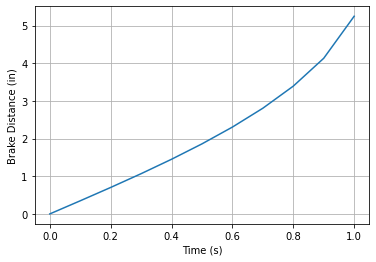

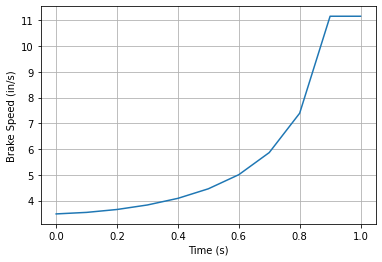

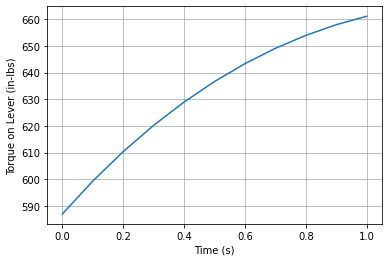

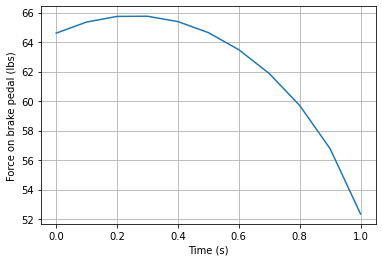

In [228]:
import math
vertical_line = sympy.Line((0, 0), (0, 1))

# adding linkage

# brake pedal
brake_mount = (0.5, 16)
brake_length = 7

# lever that connects servo to brake pedal
lever_mount = (0,0)
lever_short_arm_length = 2
lever_long_arm_length = 16
lever_offset_angle = math.radians(30.0)

# servo
servo_mount = (10, 2) # inches
servo_length = 9.1 # inches
servo_speed = 0.66 # in/s
servo_force = 333.0 # lbs

bps = []
brake_angles = []
brake_distances = []
las = []
time = 0.0
times = []
torques = []
bpfs = []
dt = 0.1
while time < 1.0:
    times.append(time)
    # get the intersection point of the servo and lever short arm
    servo = ((servo_mount[0], servo_mount[1], servo_length))
    lever_short_arm = (lever_mount[0], lever_mount[1], lever_short_arm_length)
    p_intersections = circle_circle_intersection(servo, lever_short_arm)
    # print("potential intersections: ", p_intersections)

    lever_short_arm_point = ()
    if p_intersections[0][1] > 0:
        lever_short_arm_point = p_intersections[0]
    elif p_intersections[1][1] > 0:
        lever_short_arm_point = p_intersections[1]
    else:
        print("neither intersection is viable...")
        continue

    # get the angle from the lever pivot to the lever short arm
    lever_pivot_to_short_arm = sympy.Line(lever_mount, lever_short_arm_point)
    lever_short_arm_angle = math.atan2(lever_short_arm_point[1], lever_short_arm_point[0])
    
    lever_mount_to_short_arm = np.array(lever_short_arm_point) - np.array(lever_mount)
    servo_mount_to_short_arm = np.array(lever_short_arm_point) - np.array(servo_mount)
    servo_mount_to_short_arm_uv = servo_mount_to_short_arm / np.linalg.norm(servo_mount_to_short_arm)
    # print("servo_mount_to_short_arm: ", servo_mount_to_short_arm)
    lever_torque_from_servo = servo_force * lever_mount_to_short_arm[0]*servo_mount_to_short_arm_uv[1] - servo_force * lever_mount_to_short_arm[1]*servo_mount_to_short_arm_uv[0]
    # print("lever_torque_from_servo: ", lever_torque_from_servo, " in-lbs")
    # print("lever_short_arm_angle: ", lever_short_arm_angle)
    # print("lever long arm force: ", lever_torque_from_servo / lever_long_arm_length, " lbs")

    # get the angle of the lever long arm
    lever_long_arm_angle = lever_short_arm_angle + lever_offset_angle
    # print("lever_long_arm_angle: ", lever_long_arm_angle)
    # get the maximum exension distance of the lever long arm
    lever_long_arm_point = (lever_long_arm_length * math.cos(lever_long_arm_angle), lever_long_arm_length * math.sin(lever_long_arm_angle))
    # print("lever_long_arm_max_point: ", lever_long_arm_point)
    las.append(lever_long_arm_angle)
    torques.append(lever_torque_from_servo)

    # get the intersection point with the brake pedal
    lever_long_arm_I_brake = circle_line_intersection((brake_mount[0], brake_mount[1], brake_length), (lever_mount[0], lever_mount[1], lever_long_arm_point[0], lever_long_arm_point[1]))
    # print("brake pedal / lever long arm intersection: ", lever_long_arm_I_brake)
    force_on_brake_pedal = lever_torque_from_servo / np.linalg.norm(np.array(lever_long_arm_I_brake))
    # print("force on brake pedal: ", force_on_brake_pedal)
    bpfs.append(force_on_brake_pedal)
    
    brake_angle = math.atan2(lever_long_arm_I_brake[1]-brake_mount[1], lever_long_arm_I_brake[0]-brake_mount[0])
    # print("brake angle: ", math.degrees(brake_angle))
    brake_angles.append(brake_angle)
    
    brake_distance = (brake_angles[-1] - brake_angles[0]) * brake_length
    # print("brake distance: ", brake_distance)
    brake_distances.append(brake_distance)
    
    
    # import matplotlib.pyplot as plt

    # # plot the servo
    # plt.plot([servo_mount[0], lever_short_arm_point[0]], [servo_mount[1], lever_short_arm_point[1]], 'k')
    # plt.plot(servo_mount[0], servo_mount[1], 'ko')

    # # plot the lever
    # plt.plot([lever_mount[0], lever_short_arm_point[0]], [lever_mount[1], lever_short_arm_point[1]], 'r')
    # plt.plot([lever_mount[0], lever_long_arm_point[0]], [lever_mount[1], lever_long_arm_point[1]], 'r')
    # plt.plot(lever_mount[0], lever_mount[1], 'ro')
    # plt.plot(lever_short_arm_point[0], lever_short_arm_point[1], 'ro')
    # plt.plot(lever_long_arm_point[0], lever_long_arm_point[1], 'ro')
    # # plot the brake pedal
    # plt.plot([brake_mount[0], lever_long_arm_I_brake[0]], [brake_mount[1], lever_long_arm_I_brake[1]], 'g')
    # plt.plot(brake_mount[0], brake_mount[1], 'go')
    # plt.plot(lever_long_arm_I_brake[0], lever_long_arm_I_brake[1], 'go')

    # plt.grid()
    # plt.show()
    
    time += dt
    servo_length += servo_speed * dt
    
dbps = []
for bd in range(0,len(brake_distances)):
    dbps.append(np.linalg.norm(np.array((brake_distances[bd]) - np.array(brake_distances[0]))))


plt.plot(times, dbps)
plt.xlabel("Time (s)")
plt.ylabel("Brake Distance (in)")

plt.grid()
plt.show()

b_speeds = []
for bd in range(1,len(dbps)):
    b_speeds.append((dbps[bd] - dbps[bd-1])/dt)
b_speeds.append(b_speeds[-1])

plt.plot(times, b_speeds)
plt.xlabel("Time (s)")
plt.ylabel("Brake Speed (in/s)")

plt.grid()
plt.show()

plt.plot(times, torques)
plt.xlabel("Time (s)")
plt.ylabel("Torque on Lever (in-lbs)")

plt.grid()
plt.show()

plt.plot(times, bpfs)
plt.xlabel("Time (s)")
plt.ylabel("Force on brake pedal (lbs)")

plt.grid()
plt.show()


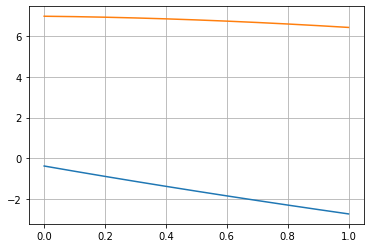

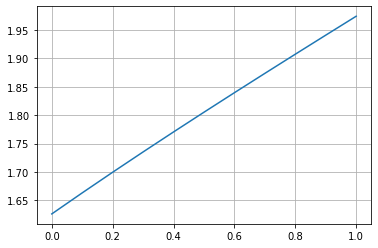

In [205]:
plt.plot(times, bps)
plt.grid()
plt.show()

plt.plot(times, las)
plt.grid()
plt.show()